<a href="https://colab.research.google.com/github/abhi-11nav/Convolution_NN-Implementation/blob/main/CNN_layers_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 

In [2]:
# Importing libraries 

import tensorflow 
from tensorflow import keras

from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPool2D
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

import cv2
from google.colab.patches import cv2_imshow

from glob import glob

In [3]:
image_size = [255,255]

In [13]:
train_path = "/content/drive/MyDrive/dataset/training_set"
test_path = "/content/drive/MyDrive/dataset/test_set"

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,vertical_flip=True, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_data = train_datagen.flow_from_directory(train_path, target_size=image_size,batch_size=32)
test_data= test_datagen.flow_from_directory(test_path, target_size=image_size,batch_size=32)

Found 8010 images belonging to 2 classes.
Found 1208 images belonging to 2 classes.


In [22]:
model = keras.models.Sequential([
Input(shape = [255,255,3]),
Conv2D(3,3, activation="relu",padding="same"),
Conv2D(3,3, activation="relu", padding="same"),
MaxPool2D(pool_size=(2,2),padding="valid",strides=(2,2)),
Conv2D(5,5, activation="relu", padding="valid"),
Conv2D(5,5, activation="relu", padding="valid"),
MaxPool2D(pool_size=(2,2),padding="valid",strides=(2,2)),
Flatten(),
Dense(500, activation="relu"),
Dense(2, activation="sigmoid")
])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 255, 255, 3)       84        
                                                                 
 conv2d_9 (Conv2D)           (None, 255, 255, 3)       84        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 3)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 123, 123, 5)       380       
                                                                 
 conv2d_11 (Conv2D)          (None, 119, 119, 5)       630       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 59, 59, 5)        0         
 2D)                                                  

In [24]:
model.compile(optimizer="sgd", loss="binary_crossentropy",metrics=["accuracy"])

In [26]:
 history = model.fit(train_data, epochs=2, validation_data = test_data)

Epoch 1/2
251/251 [==============================] - 143s 571ms/step - loss: 0.6784 - accuracy: 0.5793 - val_loss: 0.5740 - val_accuracy: 0.7889
Epoch 2/2
251/251 [==============================] - 139s 553ms/step - loss: 0.6691 - accuracy: 0.5900 - val_loss: 0.5590 - val_accuracy: 0.7873


In [28]:
import matplotlib.pyplot as plt 

%matplotlib inline 

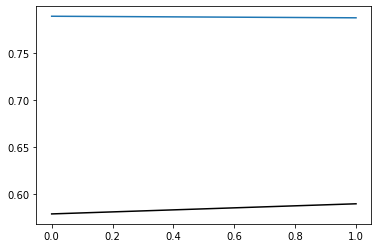

In [31]:
plt.plot(history.history["accuracy"],color="black")

plt.plot(history.history["val_accuracy"])